<h1 style="font-size:260%;"><center>Exploration of data DATASUS hospital expenses from 2008/Jan until 2020/Aug.</center></h1>

# Table of Contents:

- [Lesson 1 - Using alternative data sources](#Lesson-1---Using-alternative-data-sources)
    - [Part 01](#Lesson-1---Part-01)
        - [Challenge 1 - Read a table from Wikipedia](#Challenge-1:-Read-a-table-from-Wikipedia)
        - [Challenge 2 - Clean the dataframe](#Challenge-2:-Clean-the-dataframe)
    - [Part 02](#Lesson-1---Part-02)
        - [Challenge 3 - Study and Lean about strings and its methods](#Challenge-3:-Study-and-learn-about-strings-and-its-methods)
        - [Challenge 4 - Create a function to clean population_data_df dataframe and to merge population and recent_month](#Challenge-4:-Create-a-function-to-clean-population_data_df-dataframe-and-to-merge-population-and-recent_month)
- [Lesson 2 - Visualization, Seaborn, Proportions of Values](#Lesson-2---Visualization,-Seaborn,-Proportions-of-Values)
    - [Part 01](#Lesson-2---Part-01)
        - [Challenge 1 - Sort the bars on the graph of hospital expenses by inhabitants](#Challenge-1:-Sort-the-bars-on-the-graph-of-hospital-expenses-by-inhabitants)
        - [Challenge 2 - Plot the same graphs (bar and scatter) for the month before the current one](#Challenge-2:-Plot-the-same-graphs-(bar-and-scatter)-for-the-month-before-the-current-one)
        - [Challenge 3 - Plot in the same graph 2 different months: the most recent and the one before it](#Challenge-3:-Plot-in-the-same-graph-2-different-months:-the-most-recent-and-the-one-before-it)
    - [Part 02](#Lesson-2---Part-02)
        - [Challenge 4 - Write a conclusion from the graph](#Challenge-04:-Write-a-conclusion-from-the-graph)
- [Lesson 3 - Ticks and Scale](#Lesson-3---Ticks-and-Scale)
	- [Challenge 01, 02, 03: Improving the scatter and line plot graphs](#Challenge-01,-02,-03:-Improving-the-scatter-and-line-plot-graphs)
- [Lesson 4 - Datetime and Melt](#Lesson-4---Datetime-and-Melt)
    - [Part 01](#Lesson-4---Part-01)
    - [Part 02](#Lesson-4---Part-02)
        - [Challenge 1 - Learn about DateTime in Python](#Challenge-1:-Learn-about-DateTime-in-Python)
        - [Challenge 2 - Convert hospital_expenses_by_month_melted format to the same format as hospital_expenses_by_month](#Challenge-2:-Convert-hospital_expenses_by_month_melted-format-to-the-same-format-as-hospital_expenses_by_month)
        - [Challenge 3: Make improvements on the Monthly hospital expenses graph](#Challenge-3:-Make-improvements-on-the-Monthly-hospital-expenses-graph)
- [Lesson 5 - Evaluate annual hospital expenses](#Lesson-5---Evaluate-annual-hospital-expenses)
	- [Challenge 1: Make improvements on the 'Yearly hospital expenses' graph](#Challenge-1:-Make-improvements-on-the-'Yearly-hospital-expenses'-graph)
	- [Challenge 2: Plot line graphs for 2 different states (which have a different climate)](#Challenge-2:-Plot-line-graphs-for-2-different-states-(which-have-a-different-climate))

# Lesson 1 - Using alternative data sources
Aula 01: Usando fontes alternativas de dados

---

# Lesson 1 - Part 01

## 01. Importing Libraries

In [185]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
import matplotlib.ticker as ticker
import seaborn as sns
from datetime import date
import numpy as np

sns.set()
pd.options.display.float_format = '{:,.2f}'.format

## 02. Getting the dataset

In [2]:
url='https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv'

hospital_expenses = pd.read_csv(url, encoding='ISO-8859-1',
                                skiprows=3, sep=';', skipfooter=12,
                                thousands='.', decimal=',',
                                engine='python')

hospital_expenses.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,"8,660,753.05","8,326,416.32","8,413,784.42","7,174,312.31","7,423,678.64","8,581,195.13","9,193,593.76","7,407,388.24",3556381.57,"929,129,659.72"
1,12 Acre,-,-,-,-,-,-,-,-,-,...,"2,959,569.09","3,261,123.88","2,981,264.22","2,859,102.06","2,472,063.08","2,383,895.48","2,199,920.70","1,163,813.08",-,"420,668,039.63"
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,"14,923,380.22","15,939,561.23","15,138,110.70","14,773,739.41","16,330,913.81","19,441,150.53","17,509,334.66","13,358,514.02",4726485.73,"1,771,654,871.23"
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,"2,889,969.87","3,084,561.08","2,967,159.04","2,813,954.05","2,304,961.42","2,910,776.44","3,216,466.51","2,739,498.41",1524478.04,"305,010,883.18"
4,15 Pará,-,-,-,-,-,-,-,-,-,...,"35,222,625.80","37,009,819.17","34,635,702.52","34,749,098.46","28,714,969.96","41,248,502.78","35,396,030.78","27,618,727.51",11559714.54,"4,437,115,730.71"


## 03. Recap module 1: Cleaning the data

In [3]:
columns_without_null_values = hospital_expenses \
                                    .mean() \
                                    .index \
                                    .tolist()

columns_without_null_values.insert(0, 'Unidade da Federação')

hospital_expenses_cleaned_null = \
    hospital_expenses[columns_without_null_values] \
        .set_index('Unidade da Federação')

hospital_expenses_cleaned = \
    hospital_expenses_cleaned_null.drop("Total", axis=1) \
    .iloc[:,6:]

In [4]:
state_region = {'1': 'Norte',
                '2': 'Nordeste',
                '3': 'Sudeste',
                '4': 'Sul',
                '5': 'Centro-Oeste'}

hospital_expenses_region = hospital_expenses_cleaned.copy()

hospital_expenses_region['Região'] = \
        hospital_expenses_region \
            .index.str[0] \
            .map(state_region)

In [5]:
recent_month_2 = hospital_expenses_region.columns[-2]

recent_month_hospital_expenses = hospital_expenses_cleaned[recent_month_2] \
                                            .sort_values(ascending=False)

## 04. Let's start!

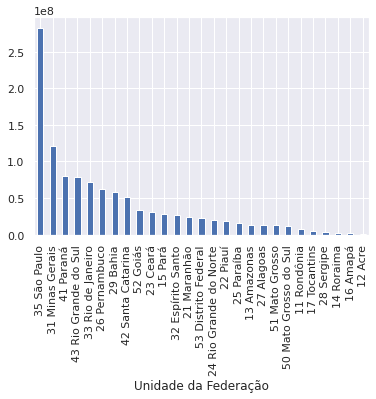

In [6]:
recent_month_hospital_expenses.plot(kind='bar')
plt.show()

In [7]:
recent_month_hospital_expenses.head()

Unidade da Federação
35 São Paulo           282,709,570.31
31 Minas Gerais        120,467,187.34
41 Paraná               80,320,852.69
43 Rio Grande do Sul    78,929,703.81
33 Rio de Janeiro       71,540,227.33
Name: 2020/Jul, dtype: float64

In [8]:
recent_month_hospital_expenses_by_state_prop = \
    (recent_month_hospital_expenses / 
     recent_month_hospital_expenses.sum())

recent_month_hospital_expenses_by_state_prop

Unidade da Federação
35 São Paulo             0.26
31 Minas Gerais          0.11
41 Paraná                0.07
43 Rio Grande do Sul     0.07
33 Rio de Janeiro        0.07
26 Pernambuco            0.06
29 Bahia                 0.05
42 Santa Catarina        0.05
52 Goiás                 0.03
23 Ceará                 0.03
15 Pará                  0.03
32 Espírito Santo        0.02
21 Maranhão              0.02
53 Distrito Federal      0.02
24 Rio Grande do Norte   0.02
22 Piauí                 0.02
25 Paraíba               0.01
13 Amazonas              0.01
27 Alagoas               0.01
51 Mato Grosso           0.01
50 Mato Grosso do Sul    0.01
11 Rondônia              0.01
17 Tocantins             0.00
28 Sergipe               0.00
14 Roraima               0.00
16 Amapá                 0.00
12 Acre                  0.00
Name: 2020/Jul, dtype: float64

- Observing the data proportionally.
- 25.7% of total hospital expenses ocurred in São Paulo.
- São Paulo has 26% of the population of Brazil?
- Also think about the age group, which one spends more in hospital? how is the age group distributed in the states?

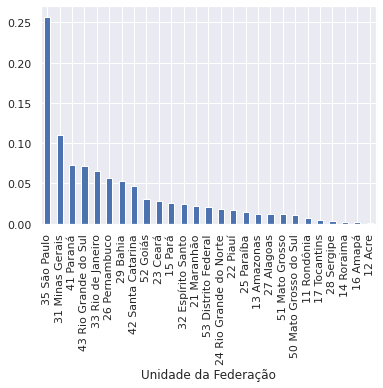

In [9]:
recent_month_hospital_expenses_by_state_prop \
    .plot(kind='bar')
plt.show()

- The proportion of the bars is the same as in the previous graph.

### Other ways to read data

- through excel file:

In [10]:
url_population = 'https://github.com/alura-cursos/agendamento-hospitalar/blob/main/dados/estimativa_dou_2020.xls?raw=true'

population_estimate_ibge = pd.read_excel(url_population, skiprows=2)
population_estimate_ibge.head()

,Brasil,Unnamed: 1,211755692
0,Região Norte,nan,18672591
1,Rondônia,nan,1796460
2,Acre,nan,894470
3,Amazonas,nan,4207714
4,Roraima,nan,631181


- copy and paste:

In [11]:
population_data = """Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)

1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 331 292	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 279 638	3,4%	 Sérvia (7 114 393)
12	 Goiás	7 142 070	3,4%	 Paraguai (7 003 406)
11	 Maranhão	7 127 460	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 228 381	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)
"""

# fonte: https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o

In [12]:
population_data_io = StringIO(population_data)

population_data_df = pd.read_csv(population_data_io, 
                                 sep='\t')

population_data_df.head()

,Posição,Unidade federativa,População,% da pop. total,País comparável
0,(habitantes),NaN,NaN,NaN,NaN
1,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864)
2,2,Minas Gerais,21 331 292,"10,1%",Sri Lanka (20 675 000)
3,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
4,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000)


## Challenge 1: Read a table from Wikipedia

- html:

In [13]:
url_population_wiki = 'https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o'
population_estimate_wiki = pd.read_html(url_population_wiki, 
                                        thousands=' ', index_col=0)[0]

population_estimate_wiki.head()

,Unidade federativa,População,% da pop. total,País comparável (habitantes)
Posição,,,,
1,São Paulo,46289333,"21,9%",Espanha (46 439 864)
2,Minas Gerais,21331292,"10,1%",Sri Lanka (20 675 000)
3,Rio de Janeiro,17366189,"8,2%",Países Baixos (16 922 900)
4,Bahia,14930634,"7,1%",Chade (14 037 000)
5,Paraná,11516840,"5,4%",Bolívia (11 410 651)


## Challenge 2: Clean the dataframe 
For example: change column names and values for population column

In [14]:
population_estimate_wiki = \
    population_estimate_wiki \
        .rename(columns={'Unidade federativa': 'uf'})

population_estimate_wiki.columns = \
    population_estimate_wiki.columns.str.lower() \
                                    .str.replace(' ', '_') \
                                    .str.normalize('NFKD') \
                                    .str.encode('ascii', errors='ignore') \
                                    .str.decode('utf-8')

population_estimate_wiki = \
    population_estimate_wiki \
        .reset_index() \
        .set_index('uf')

population_estimate_wiki.head()

,Posição,populacao,%_da_pop._total,pais_comparavel_(habitantes)
uf,,,,
São Paulo,1,46289333,"21,9%",Espanha (46 439 864)
Minas Gerais,2,21331292,"10,1%",Sri Lanka (20 675 000)
Rio de Janeiro,3,17366189,"8,2%",Países Baixos (16 922 900)
Bahia,4,14930634,"7,1%",Chade (14 037 000)
Paraná,5,11516840,"5,4%",Bolívia (11 410 651)


# Lesson 1 - Part 02

In [15]:
population_estimate_2020 = \
    population_estimate_wiki[['populacao']]

population_estimate_2020.head()

,populacao
uf,
São Paulo,46289333
Minas Gerais,21331292
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840


In [16]:
population_estimate_2020.index.str[:3]

Index(['São', 'Min', 'Rio', 'Bah', 'Par', 'Rio', 'Per', 'Cea', 'Par', 'San',
       'Goi', 'Mar', 'Ama', 'Esp', 'Par', 'Rio', 'Mat', 'Ala', 'Pia', 'Dis',
       'Mat', 'Ser', 'Ron', 'Toc', 'Acr', 'Ama', 'Ror'],
      dtype='object', name='uf')

In [17]:
recent_month_hospital_expenses.head()

Unidade da Federação
35 São Paulo           282,709,570.31
31 Minas Gerais        120,467,187.34
41 Paraná               80,320,852.69
43 Rio Grande do Sul    78,929,703.81
33 Rio de Janeiro       71,540,227.33
Name: 2020/Jul, dtype: float64

In [18]:
# removing the numbers at the beginning of each state
recent_month_hospital_expenses.index = \
    recent_month_hospital_expenses.index.str[3:]

recent_month_hospital_expenses.head()

Unidade da Federação
São Paulo           282,709,570.31
Minas Gerais        120,467,187.34
Paraná               80,320,852.69
Rio Grande do Sul    78,929,703.81
Rio de Janeiro       71,540,227.33
Name: 2020/Jul, dtype: float64

In [19]:
# how to remove spaces from the beginning and end of the string
# there is no space in my indexes, this code snippet is just to show how to do that
population_estimate_2020.index.str.strip()

Index(['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Bahia', 'Paraná',
       'Rio Grande do Sul', 'Pernambuco', 'Ceará', 'Pará', 'Santa Catarina',
       'Goiás', 'Maranhão', 'Amazonas', 'Espírito Santo', 'Paraíba',
       'Rio Grande do Norte', 'Mato Grosso', 'Alagoas', 'Piauí',
       'Distrito Federal', 'Mato Grosso do Sul', 'Sergipe', 'Rondônia',
       'Tocantins', 'Acre', 'Amapá', 'Roraima'],
      dtype='object', name='uf')

**Challenge 3: Learn about strings and its methods.**

In [20]:
population_estimate_2020 \
    .join(recent_month_hospital_expenses)

,populacao,2020/Jul
uf,,
São Paulo,46289333,"282,709,570.31"
Minas Gerais,21331292,"120,467,187.34"
Rio de Janeiro,17366189,"71,540,227.33"
Bahia,14930634,"58,898,100.40"
Paraná,11516840,"80,320,852.69"
Rio Grande do Sul,11422973,"78,929,703.81"
Pernambuco,9616621,"62,325,444.34"
Ceará,9187103,"30,809,221.22"
Pará,8690745,"27,618,727.51"


In [21]:
# population_data_df has duplicate state indexes
# i'm not using this variable, but just to learn how to correct it

population_data_df = population_data_df \
                        .set_index('Unidade federativa')

for state in recent_month_hospital_expenses.index:
    #print(f'{state} {state} => {state}')
    population_data_df.index = \
        population_data_df.index.str.replace(f'{state} {state}', state)
    
population_data_df.index

Index([                   nan,           ' São Paulo',        ' Minas Gerais',
            ' Rio de Janeiro',                'Bahia',              ' Paraná',
         ' Rio Grande do Sul',          ' Pernambuco',               ' Ceará',
                       'Pará',      ' Santa Catarina',               ' Goiás',
                  ' Maranhão',            ' Amazonas',      ' Espírito Santo',
                   ' Paraíba', ' Rio Grande do Norte',         ' Mato Grosso',
                   ' Alagoas',               ' Piauí',    ' Distrito Federal',
        ' Mato Grosso do Sul',             ' Sergipe',            ' Rondônia',
                 ' Tocantins',                ' Acre',               ' Amapá',
                   ' Roraima'],
      dtype='object', name='Unidade federativa')

**Challenge 4: Create a function to clean population_data_df dataframe.**

## Challenge 3: Study and learn about strings and its methods

See: https://docs.python.org/3/library/string.html

## Challenge 4: Create a function to clean population_data_df dataframe and to merge population and recent_month

In [22]:
def clean_population_data_df(df2: pd.DataFrame, population=population_data_df) -> pd.DataFrame:
    '''
    Return population_data_df with population column and uf as its index.
    
    Clean dataframe columns: in lower case, with underscore instead of spaced, and normalized. 
    It also renames a unidade_federativa column to uf. 
    
    Setting uf as an index.
    
    Clean values: clean index values and population values. 
    (It uses another df (df2) to clean the uf values)
    '''
    
    # cleaning columns
    population.columns = population.columns.str.lower() \
                                   .str.replace(' ', '_') \
                                   .str.normalize('NFKD') \
                                   .str.encode('ascii', errors='ignore') \
                                   .str.decode('utf-8')
    
    population = population.rename(columns={'unidade_federativa': 'uf'})
    
    # setting uf index
    population = population.reset_index().set_index('uf')
    
    # cleaning values
    population['populacao'] = population['populacao'].str.replace(' ', '')
    
    population.index = population.index.str.strip()
    
    for state in df2.index:
        population.index = population.index.str.replace(f'{state} {state}', state)
    
    return population[['populacao']]



def join_population_hospital_expenses(population=population_data_df, he=population_data_df) -> pd.DataFrame:
    '''
    Return population_data_df joined with recent_month_hospital_expenses.
    population_data_df should have 'uf' as index.
    '''
    return population.join(he)

In [23]:
population_data_io = StringIO(population_data)

population_data_df = pd.read_csv(population_data_io, 
                                 sep='\t')[1:]

population_data_df.head()

,Posição,Unidade federativa,População,% da pop. total,País comparável
1,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864)
2,2,Minas Gerais,21 331 292,"10,1%",Sri Lanka (20 675 000)
3,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
4,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000)
5,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)


In [24]:
recent_month_hospital_expenses.head()

Unidade da Federação
São Paulo           282,709,570.31
Minas Gerais        120,467,187.34
Paraná               80,320,852.69
Rio Grande do Sul    78,929,703.81
Rio de Janeiro       71,540,227.33
Name: 2020/Jul, dtype: float64

In [25]:
population_data_df_cleaned = \
    clean_population_data_df(df2=recent_month_hospital_expenses,
                             population=population_data_df)

# setting parameters just to be clear
join_population_hospital_expenses(population=population_data_df_cleaned,
                                  he=recent_month_hospital_expenses) \
    .head()

,populacao,2020/Jul
uf,,
São Paulo,46289333,"282,709,570.31"
Minas Gerais,21331292,"120,467,187.34"
Rio de Janeiro,17366189,"71,540,227.33"
Bahia,14930634,"58,898,100.40"
Paraná,11516840,"80,320,852.69"


# Lesson 2 - Visualization, Seaborn, Proportions of Values

Aula 02: Visualização, Seaborn e Proporcionalidades

---

# Lesson 2 - Part 01

In [26]:
recent_hospital_expenses_and_population = \
    population_estimate_2020 \
        .join(recent_month_hospital_expenses)

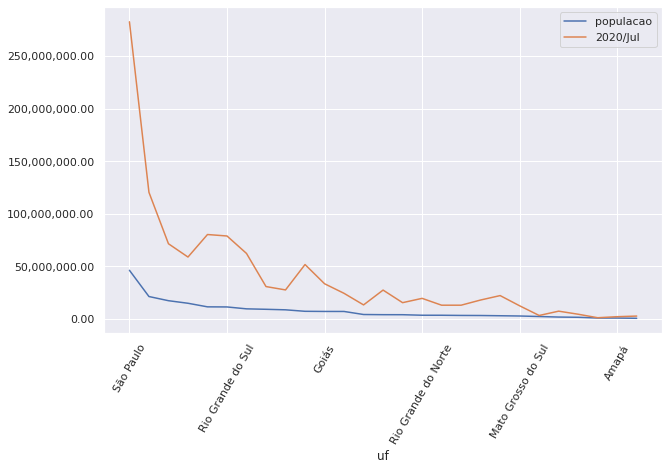

In [27]:
ax = recent_hospital_expenses_and_population \
        .plot(figsize=(10,6))

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.xticks(rotation=60)
plt.show()

- The difference between the population of São Paulo and Rio Grande do Sul is not as big as their difference in hospital expenses.
- Let's check the real numbers

In [28]:
recent_hospital_expenses_and_population \
    .loc[['Rio Grande do Sul',
          'São Paulo']]

,populacao,2020/Jul
uf,,
Rio Grande do Sul,11422973,"78,929,703.81"
São Paulo,46289333,"282,709,570.31"


- How much did each one spend per number of inhabitants?

In [29]:
78929703.81 / 11422973

6.909733902899009

In [30]:
282709570.31 / 46289333

6.107445322446102

- "The difference between the population of São Paulo and Rio Grande do Sul is not as big as their difference in hospital expenses."

- **But actually they spent in hospital expenses per inhabitantes almost the same.**

- Through the graph above, we cannot see that São Paulo is spending per inhabitants almost the same of Rio Grande do Sul.

In [31]:
recent_hospital_expenses_and_population["expenses_by_inhabitants"] = \
    (recent_hospital_expenses_and_population['2020/Jul'] /
     recent_hospital_expenses_and_population['populacao'])

recent_hospital_expenses_and_population.head()

,populacao,2020/Jul,expenses_by_inhabitants
uf,,,
São Paulo,46289333,"282,709,570.31",6.11
Minas Gerais,21331292,"120,467,187.34",5.65
Rio de Janeiro,17366189,"71,540,227.33",4.12
Bahia,14930634,"58,898,100.40",3.94
Paraná,11516840,"80,320,852.69",6.97


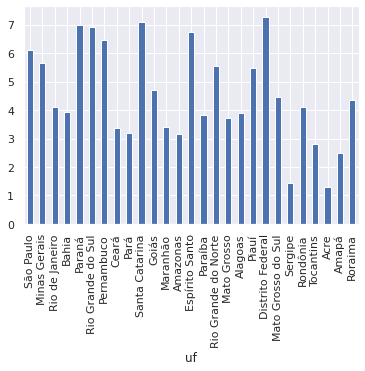

In [32]:
recent_hospital_expenses_and_population['expenses_by_inhabitants'] \
    .plot(kind='bar')

plt.show()

- The graph above is ordering by absolute value
- São Paulo is the state that has the highest hospital expenses. However, seems that Distrito Federal is the state that has the highest hospital expenses by inhabitants.

**Challenge 1: Sort the bars on the graph of hospital expenses by inhabitants.**

Sort it by hopital expenses by inhabitants, and by population.

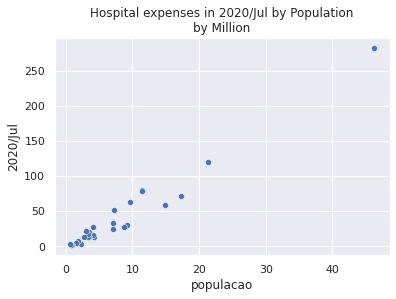

In [33]:
sns.scatterplot(data=recent_hospital_expenses_and_population / 1000000,
                x='populacao', y='2020/Jul')

plt.title('Hospital expenses in 2020/Jul by Population\n'+
          'by Million')
plt.show()

- Is there some correlation?
- Notice: the scales of the graph are different = It's not a 1:1 correlation
- x and y axis are in million

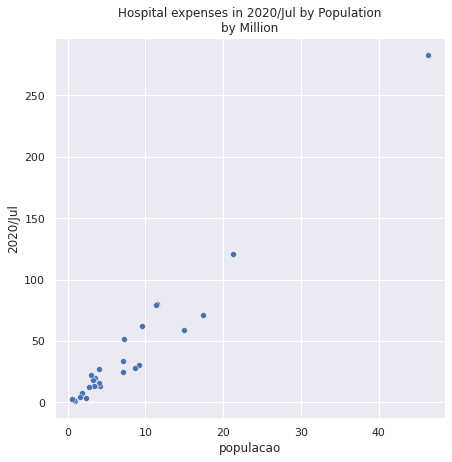

In [34]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=recent_hospital_expenses_and_population / 1000000,
                x='populacao', y='2020/Jul')

plt.title('Hospital expenses in 2020/Jul by Population\n'+
          'by Million')
plt.show()

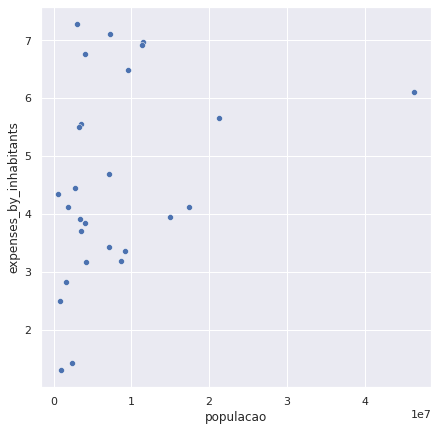

In [35]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=recent_hospital_expenses_and_population,
                x='populacao', y='expenses_by_inhabitants')

plt.show()

**Challenge 2: Plot the same graphs (bar and scatter) for the month before the current one.**

**Challenge 3: Plot in the same graph 2 different months: the most recent and the one before it. You can use colors to make the months different from each other.**

## Challenge 1: Sort the bars on the graph of hospital expenses by inhabitants

Sort it by hopital expenses by inhabitants, and by population.

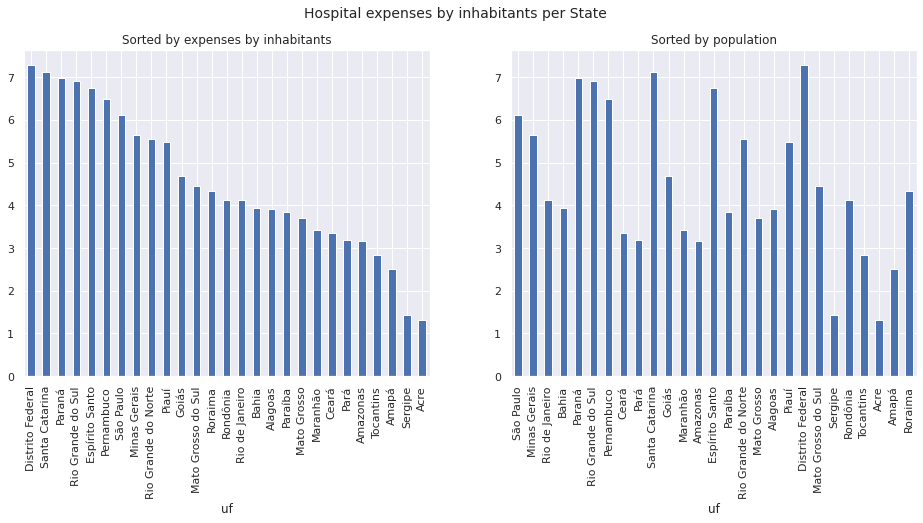

In [36]:
fig, axis = plt.subplots(1,2, figsize=(16,6))

recent_hospital_expenses_and_population \
    .sort_values('expenses_by_inhabitants', ascending=False) \
    .plot(kind='bar', y='expenses_by_inhabitants', 
          ax=axis[0], legend=None)

axis[0].set_title("Sorted by expenses by inhabitants")

recent_hospital_expenses_and_population \
    .sort_values('populacao', ascending=False) \
    .plot(kind='bar', y='expenses_by_inhabitants', 
          ax=axis[1], legend=None)

axis[1].set_title("Sorted by population")

fig.suptitle("Hospital expenses by inhabitants per State", fontsize=14)
plt.show()

## Challenge 2: Plot the same graphs (bar and scatter) for the month before the current one

In [37]:
previous_month = hospital_expenses_region.columns[-3]

previous_month_hospital_expenses = \
    hospital_expenses_cleaned[previous_month] \
        .sort_values(ascending=False)

previous_month_hospital_expenses.index = \
    previous_month_hospital_expenses \
    .index \
    .str[3:]

previous_hospital_expenses_and_population = \
    population_estimate_2020 \
        .join(previous_month_hospital_expenses)

previous_hospital_expenses_and_population["expenses_by_inhabitants"] = \
    (previous_hospital_expenses_and_population[previous_month] /
     previous_hospital_expenses_and_population['populacao'])

previous_hospital_expenses_and_population.head()

,populacao,2020/Jun,expenses_by_inhabitants
uf,,,
São Paulo,46289333,"299,060,851.62",6.46
Minas Gerais,21331292,"135,977,571.87",6.37
Rio de Janeiro,17366189,"77,604,925.21",4.47
Bahia,14930634,"65,159,300.63",4.36
Paraná,11516840,"92,901,461.36",8.07


In [38]:
previous_hospital_expenses_and_population.columns

Index(['populacao', '2020/Jun', 'expenses_by_inhabitants'], dtype='object')

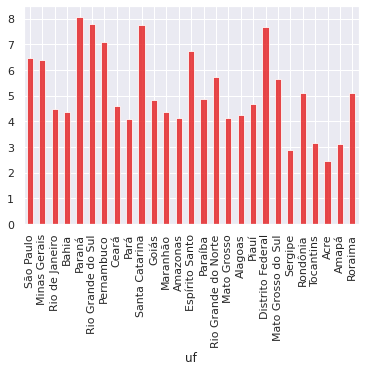

In [39]:
previous_hospital_expenses_and_population['expenses_by_inhabitants'] \
    .plot(kind='bar', colormap='Set1', alpha=0.8)

plt.show()

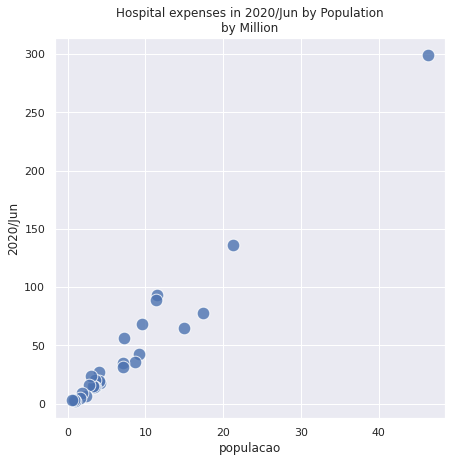

In [40]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=previous_hospital_expenses_and_population / 1000000,
                x='populacao', y=previous_month, 
                palette='Set1', alpha=0.8, s=160)

plt.title('Hospital expenses in ' + previous_month + ' by Population\n'+
          'by Million')
plt.show()

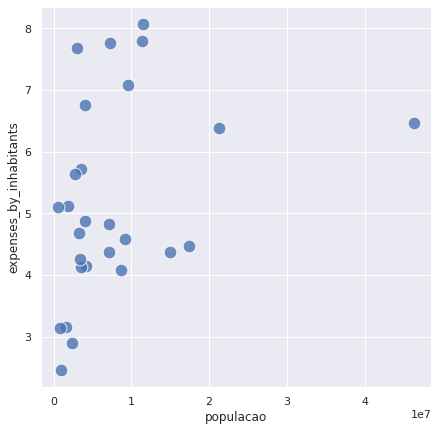

In [41]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=previous_hospital_expenses_and_population,
                x='populacao', y='expenses_by_inhabitants',
                palette='Set1', alpha=0.8, s=160)

plt.show()

- Comparing the most recent month and previous one.

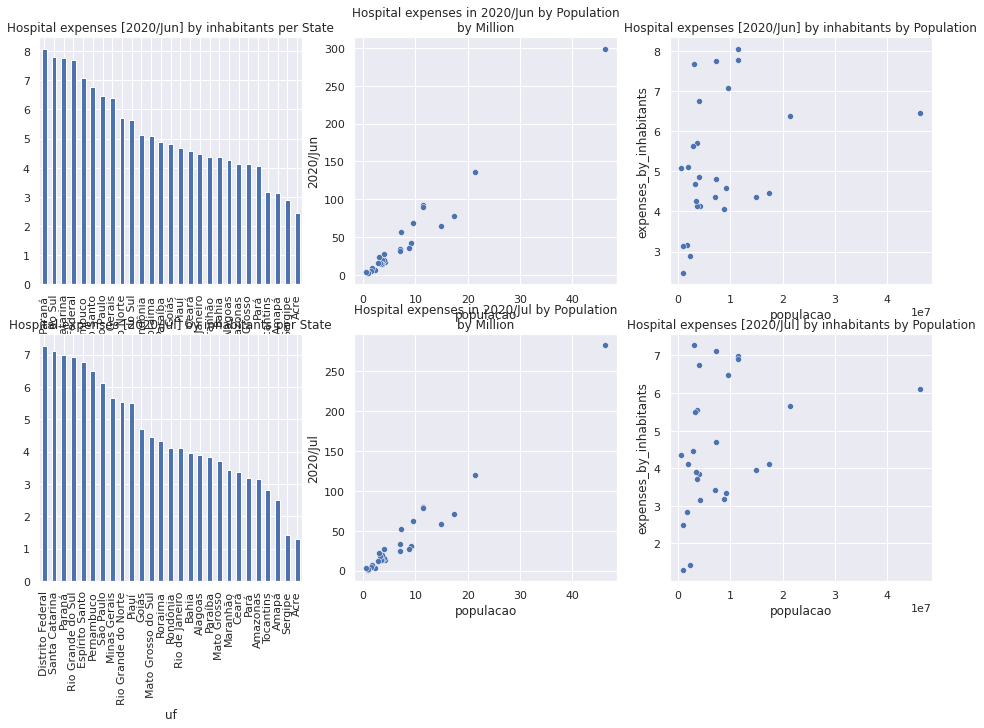

In [42]:
fig, axis = plt.subplots(2,3, figsize=(16,10))

previous_hospital_expenses_and_population \
    ['expenses_by_inhabitants'] \
    .sort_values(ascending=False) \
    .plot(kind='bar', ax=axis[0,0], legend=None)

axis[0,0].set_title("Hospital expenses [2020/Jun] by inhabitants per State")

sns.scatterplot(data=previous_hospital_expenses_and_population / 1000000,
                x='populacao', y=previous_month,
                ax=axis[0,1], legend=None)

axis[0,1].set_title('Hospital expenses in 2020/Jun by Population\n'+
                    'by Million')

sns.scatterplot(data=previous_hospital_expenses_and_population,
                x='populacao', y='expenses_by_inhabitants',
                ax=axis[0,2], legend=None)

axis[0,2].set_title("Hospital expenses [2020/Jun] by inhabitants by Population")

recent_hospital_expenses_and_population \
    ['expenses_by_inhabitants'] \
    .sort_values(ascending=False) \
    .plot(kind='bar', y='expenses_by_inhabitants', 
          ax=axis[1,0], legend=None)

axis[1,0].set_title("Hospital expenses [2020/Jul] by inhabitants per State")

sns.scatterplot(data=recent_hospital_expenses_and_population / 1000000,
                x='populacao', y='2020/Jul',
                ax=axis[1,1], legend=None)

axis[1,1].set_title('Hospital expenses in 2020/Jul by Population\n'+
                    'by Million')

sns.scatterplot(data=recent_hospital_expenses_and_population,
                x='populacao', y='expenses_by_inhabitants',
                ax=axis[1,2], legend=None)

axis[1,2].set_title("Hospital expenses [2020/Jul] by inhabitants by Population")

plt.show()

- Needs improvements: limit and share of axis.

## Challenge 3: Plot in the same graph 2 different months: the most recent and the one before it

You can use colors to make the months different from each other.

In [43]:
recent_hospital_expenses_and_population = \
    recent_hospital_expenses_and_population \
        .rename(columns={recent_month_2: 'expenses'})

previous_hospital_expenses_and_population = \
    previous_hospital_expenses_and_population \
        .rename(columns={previous_month: 'expenses'})

hospital_expenses_and_population = \
    pd.concat([recent_hospital_expenses_and_population,
               previous_hospital_expenses_and_population], 
              keys=[recent_month_2, previous_month]) \
    .reset_index() \
    .rename(columns={'level_0': 'date'})

In [44]:
hospital_expenses_and_population.head()

,date,uf,populacao,expenses,expenses_by_inhabitants
0,2020/Jul,São Paulo,46289333,"282,709,570.31",6.11
1,2020/Jul,Minas Gerais,21331292,"120,467,187.34",5.65
2,2020/Jul,Rio de Janeiro,17366189,"71,540,227.33",4.12
3,2020/Jul,Bahia,14930634,"58,898,100.40",3.94
4,2020/Jul,Paraná,11516840,"80,320,852.69",6.97


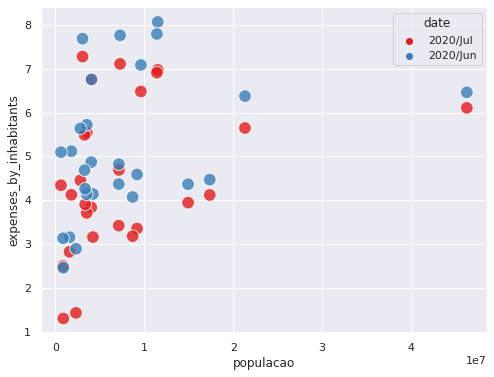

In [45]:
plt.figure(figsize=(8,6))

sns.scatterplot(data=hospital_expenses_and_population,
                x='populacao', y='expenses_by_inhabitants',
                hue='date', s=160, palette='Set1', alpha=0.8)

plt.show()

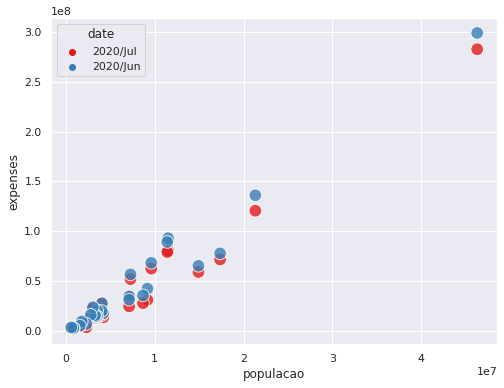

In [46]:
plt.figure(figsize=(8,6))

sns.scatterplot(data=hospital_expenses_and_population,
                x='populacao', y='expenses',
                hue='date', s=160, palette='Set1', alpha=0.8)

plt.show()

- We can see that the expenditure in July is lower than June.
- Does the month of July have a record of every day?

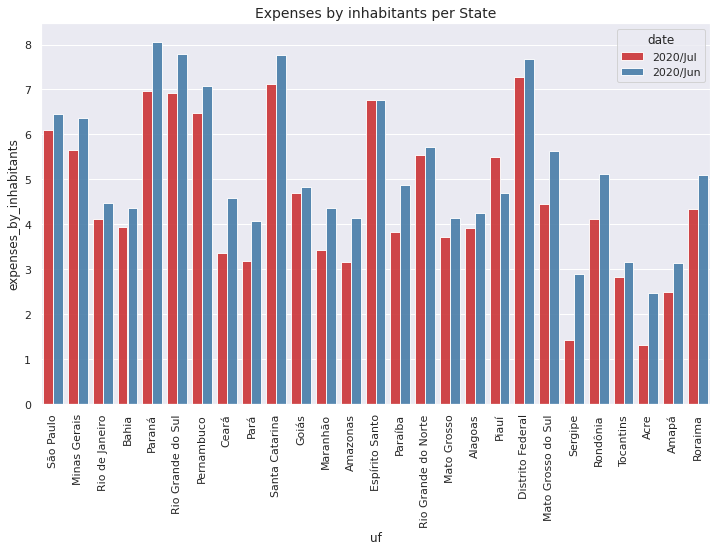

In [47]:
plt.figure(figsize=(12,7))

sns.barplot(data=hospital_expenses_and_population,
            x='uf', y='expenses_by_inhabitants',
            hue='date', palette='Set1', alpha=0.9)

plt.title('Expenses by inhabitants per State', fontsize=14)
plt.xticks(rotation=90)

plt.show()

# Lesson 2 - Part 02
Solving challenge 02 and 03 - Solution by teachers.

In [48]:
# we can refactory the code above with a funtion:

# the parameter types are called by 'type hints'
def insert_month_expenses(hopistal_expenses_cleaned: pd.DataFrame, 
                          df: pd.DataFrame, month: str):
    month_hospital_expenses = hospital_expenses_cleaned[month]
    df[f'{month}_expenses'] = month_hospital_expenses
    df[f'{month}_expenses_by_inhabitants'] = (df[f'{month}_expenses'] /
                                              df['populacao'])

In [49]:
hospital_expenses_and_population_2 = \
    population_estimate_2020 \
        .join(recent_month_hospital_expenses)

hospital_expenses_and_population_2["expenses_by_inhabitants"] = \
    (hospital_expenses_and_population_2[recent_month_2] /
     hospital_expenses_and_population_2['populacao'])

# hospital_expenses_and_population_2

In [50]:
hospital_expenses_cleaned.index = \
    hospital_expenses_cleaned.index.str[3:]

insert_month_expenses(hospital_expenses_cleaned,
                      hospital_expenses_and_population_2, 
                      previous_month)

hospital_expenses_and_population_2.head()

,populacao,2020/Jul,expenses_by_inhabitants,2020/Jun_expenses,2020/Jun_expenses_by_inhabitants
uf,,,,,
São Paulo,46289333,"282,709,570.31",6.11,"299,060,851.62",6.46
Minas Gerais,21331292,"120,467,187.34",5.65,"135,977,571.87",6.37
Rio de Janeiro,17366189,"71,540,227.33",4.12,"77,604,925.21",4.47
Bahia,14930634,"58,898,100.40",3.94,"65,159,300.63",4.36
Paraná,11516840,"80,320,852.69",6.97,"92,901,461.36",8.07


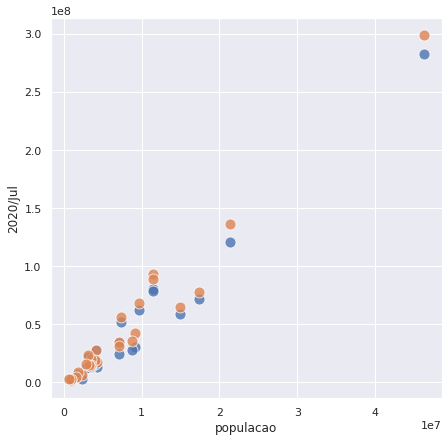

In [95]:
# it's not the best way to plot 2 different information

plt.figure(figsize=(7,7))
sns.scatterplot(data=hospital_expenses_and_population_2,
                x='populacao', y='2020/Jul',
                palette='Set1', alpha=0.8, s=120)

sns.scatterplot(data=hospital_expenses_and_population_2,
                x='populacao', y='2020/Jun_expenses',
                palette='Set1', alpha=0.8, s=120)

plt.show()

- We can see that the expenditure in July is lower than June.
- Does the month of July have a record of every day?

In [52]:
insert_month_expenses(hospital_expenses_cleaned,
                      hospital_expenses_and_population_2, 
                      '2020/Mai')

#hospital_expenses_and_population_2.head()

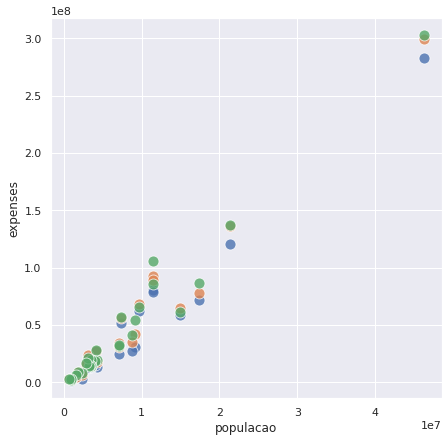

In [53]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=hospital_expenses_and_population_2,
                x='populacao', y='2020/Jul',
                palette='Set1', alpha=0.8, s=120)

sns.scatterplot(data=hospital_expenses_and_population_2,
                x='populacao', y='2020/Jun_expenses',
                palette='Set1', alpha=0.8, s=120)

sns.scatterplot(data=hospital_expenses_and_population_2,
                x='populacao', y='2020/Mai_expenses',
                palette='Set1', alpha=0.8, s=120)

plt.ylabel('expenses')
plt.show()

## Challenge 04: Write a conclusion from the graph

Analyze the graphs and try to think about some hypothesis that explain what you are understanding of the data. Remember that if you don't see any relationship in the graph, it's a conclusion. And also remember that the data will be changed.

We cannot say so much, because this data is very recent and probably it'll change a lot because the dataset is about hospital procedures.

# Lesson 3 - Ticks and Scale
Aula 04: Formatação de Ticks e Escalas

---

In [54]:
hospital_expenses_cleaned.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
Rondônia,"1,940,792.63","1,955,721.68","2,143,353.81","2,280,382.58","2,624,542.97","2,973,421.02","2,938,286.29","2,843,930.91","2,878,153.20","2,780,022.62",...,"8,924,348.41","8,948,605.66","8,660,753.05","8,326,416.32","8,413,784.42","7,174,312.31","7,423,678.64","8,581,195.13","9,193,593.76","7,407,388.24"
Acre,"1,743,978.66","2,057,439.02","2,057,829.69","2,226,577.93","2,112,576.82","2,029,128.01","1,886,871.84","2,084,884.80","2,230,838.45","2,122,013.12",...,"3,293,378.97","3,174,249.43","2,959,569.09","3,261,123.88","2,981,264.22","2,859,102.06","2,472,063.08","2,383,895.48","2,199,920.70","1,163,813.08"
Amazonas,"7,934,652.10","8,641,517.13","8,531,576.49","9,079,902.15","8,646,295.77","8,755,806.50","8,331,763.97","8,148,089.92","7,681,661.02","7,761,445.21",...,"16,282,436.68","14,781,332.42","14,923,380.22","15,939,561.23","15,138,110.70","14,773,739.41","16,330,913.81","19,441,150.53","17,509,334.66","13,358,514.02"
Roraima,"771,687.83","876,091.18","896,952.53","1,027,288.73","938,293.54","1,004,340.44","1,045,291.11","1,003,740.89","1,055,063.43","1,223,200.73",...,"3,162,342.44","3,121,104.71","2,889,969.87","3,084,561.08","2,967,159.04","2,813,954.05","2,304,961.42","2,910,776.44","3,216,466.51","2,739,498.41"
Pará,"20,126,081.01","22,149,375.82","23,436,682.75","23,861,080.80","23,502,915.90","22,544,291.26","23,259,148.28","23,667,690.01","23,352,577.75","23,537,613.41",...,"36,974,859.69","35,555,518.00","35,222,625.80","37,009,819.17","34,635,702.52","34,749,098.46","28,714,969.96","41,248,502.78","35,396,030.78","27,618,727.51"


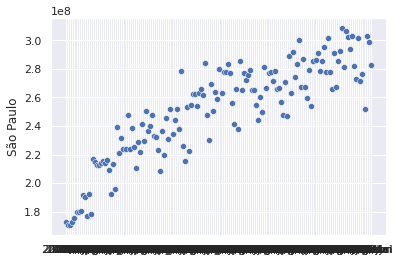

In [55]:
sns.scatterplot(x=hospital_expenses_cleaned.columns,
                y=hospital_expenses_cleaned.loc['São Paulo'])

plt.show()

In [56]:
hospital_expenses_by_month = \
    hospital_expenses_cleaned.T

hospital_expenses_by_month.head()

Unidade da Federação,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,...,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
2008/Fev,"1,940,792.63","1,743,978.66","7,934,652.10","771,687.83","20,126,081.01","1,275,063.72","5,051,932.07","13,452,263.93","9,711,680.20","27,643,304.86",...,"10,032,886.43","44,122,593.19","172,834,914.73","48,855,046.46","24,409,572.92","45,897,704.82","8,279,288.79","7,929,894.93","18,149,374.27","10,215,956.80"
2008/Mar,"1,955,721.68","2,057,439.02","8,641,517.13","876,091.18","22,149,375.82","1,177,745.93","5,200,151.87","14,750,895.33","10,428,191.09","30,085,370.22",...,"12,262,049.08","42,892,665.52","170,481,849.56","55,611,791.07","27,483,480.50","52,928,695.92","9,793,888.78","9,416,367.68","20,992,213.03","11,627,918.26"
2008/Abr,"2,143,353.81","2,057,829.69","8,531,576.49","896,952.53","23,436,682.75","1,396,371.51","5,343,714.73","15,148,647.11","10,227,943.00","31,376,221.00",...,"12,453,466.98","45,295,962.86","170,278,285.95","56,115,135.82","27,806,641.44","51,972,416.77","8,997,542.75","9,390,588.03","21,049,477.30","11,922,015.36"
2008/Mai,"2,280,382.58","2,226,577.93","9,079,902.15","1,027,288.73","23,861,080.80","1,411,520.77","5,344,487.99","14,543,679.92","10,562,148.66","31,189,904.62",...,"11,789,786.09","43,951,349.46","172,402,180.59","55,574,831.93","28,354,279.52","51,679,350.79","9,842,108.59","9,378,197.25","19,162,546.79","11,900,817.00"
2008/Jun,"2,624,542.97","2,112,576.82","8,646,295.77","938,293.54","23,502,915.90","1,420,892.01","5,398,413.09","14,553,978.06","10,465,088.93","29,463,965.11",...,"11,889,687.35","44,102,925.77","175,416,595.83","56,094,754.74","28,993,292.76","53,759,674.01","10,257,782.00","9,450,300.60","20,332,533.92","11,969,271.76"


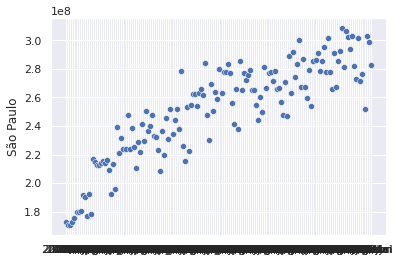

In [57]:
sns.scatterplot(data=hospital_expenses_by_month,
                x=hospital_expenses_by_month.index,
                y='São Paulo')

plt.show()

**Challenge 01: Plot the scatter graph for state you was born by expenses.**

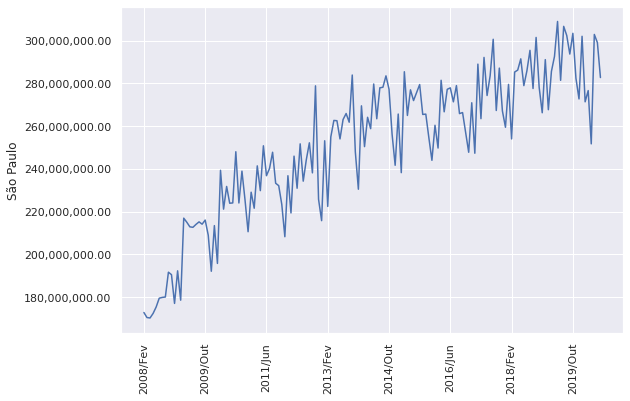

In [58]:
plt.figure(figsize=(9,6))

ax = sns.lineplot(data=hospital_expenses_by_month,
                  x=hospital_expenses_by_month.index,
                  y='São Paulo')

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.xaxis.set_major_locator(ticker.AutoLocator())

plt.xticks(rotation=90)
plt.show()

**Challenge 02: Use StrMethodFormatter in the graph above.** <br>
I already did it.

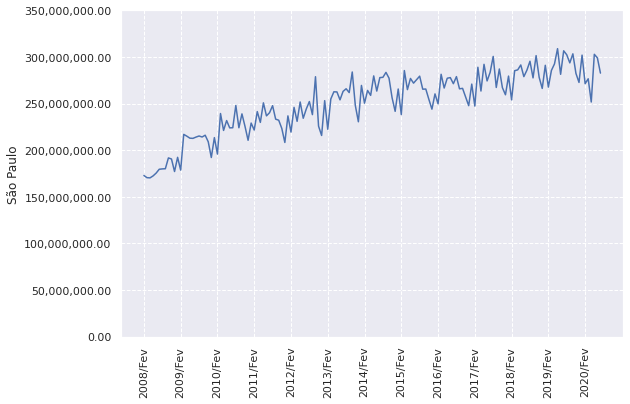

In [59]:
plt.figure(figsize=(9,6))

ax = sns.lineplot(data=hospital_expenses_by_month,
                  x=hospital_expenses_by_month.index,
                  y='São Paulo')

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0))

plt.ylim(0, 350000000)
plt.grid(linestyle='--')
plt.xticks(rotation=90)
plt.show()

**Challenge 03: Put title on the graph and its axes.** <br>
Format the graph title.

## Challenge 01, 02, 03: Improving the scatter and line plot graphs
- Challenge 01: Plot the scatter graph for state you was born by expenses
- Challenge 02: Use StrMethodFormatter in the graph above
- Challenge 03: Put title on the graph and its axes
    - Format the graph title.

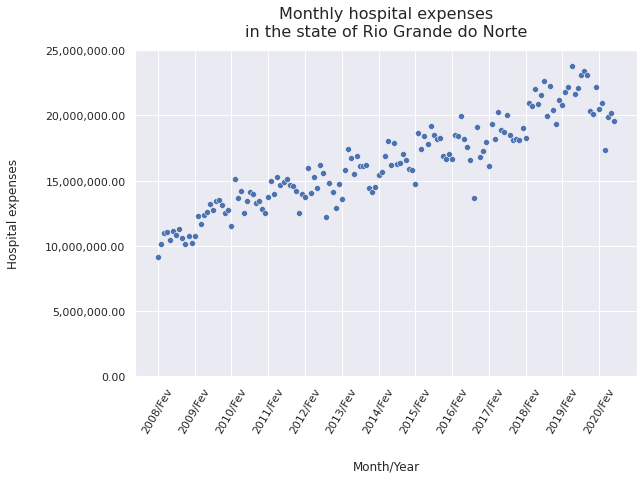

In [60]:
plt.figure(figsize=(9,6))

ax = sns.scatterplot(data=hospital_expenses_by_month,
                     x=hospital_expenses_by_month.index,
                     y='Rio Grande do Norte')

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0))

plt.ylim(0, 25000000)
plt.xticks(rotation=60)
plt.title('Monthly hospital expenses\n'+
          'in the state of Rio Grande do Norte',
          fontsize=16, y=1.026)
plt.xlabel('Month/Year', labelpad=25)
plt.ylabel('Hospital expenses',labelpad=25)
plt.show()

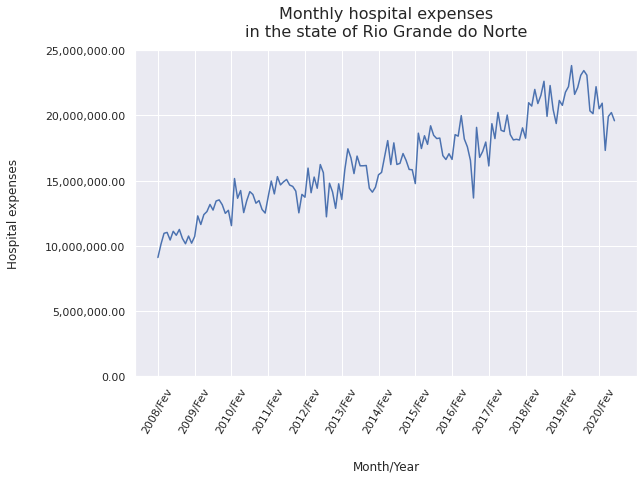

In [61]:
plt.figure(figsize=(9,6))

ax = sns.lineplot(data=hospital_expenses_by_month,
                  x=hospital_expenses_by_month.index,
                  y='Rio Grande do Norte')

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0))

plt.ylim(0, 25000000)
plt.xticks(rotation=60)
plt.title('Monthly hospital expenses\n'+
          'in the state of Rio Grande do Norte',
          fontsize=16, y=1.026)
plt.xlabel('Month/Year', labelpad=25)
plt.ylabel('Hospital expenses',labelpad=25)
plt.show()

# Lesson 4 - Datetime and Melt
Aula 04: Trabalhando com Datetime e Melt

---

# Lesson 4 - Part 01

In [62]:
date.today()

datetime.date(2020, 11, 26)

In [63]:
hospital_expenses_by_month.head()

Unidade da Federação,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,...,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
2008/Fev,"1,940,792.63","1,743,978.66","7,934,652.10","771,687.83","20,126,081.01","1,275,063.72","5,051,932.07","13,452,263.93","9,711,680.20","27,643,304.86",...,"10,032,886.43","44,122,593.19","172,834,914.73","48,855,046.46","24,409,572.92","45,897,704.82","8,279,288.79","7,929,894.93","18,149,374.27","10,215,956.80"
2008/Mar,"1,955,721.68","2,057,439.02","8,641,517.13","876,091.18","22,149,375.82","1,177,745.93","5,200,151.87","14,750,895.33","10,428,191.09","30,085,370.22",...,"12,262,049.08","42,892,665.52","170,481,849.56","55,611,791.07","27,483,480.50","52,928,695.92","9,793,888.78","9,416,367.68","20,992,213.03","11,627,918.26"
2008/Abr,"2,143,353.81","2,057,829.69","8,531,576.49","896,952.53","23,436,682.75","1,396,371.51","5,343,714.73","15,148,647.11","10,227,943.00","31,376,221.00",...,"12,453,466.98","45,295,962.86","170,278,285.95","56,115,135.82","27,806,641.44","51,972,416.77","8,997,542.75","9,390,588.03","21,049,477.30","11,922,015.36"
2008/Mai,"2,280,382.58","2,226,577.93","9,079,902.15","1,027,288.73","23,861,080.80","1,411,520.77","5,344,487.99","14,543,679.92","10,562,148.66","31,189,904.62",...,"11,789,786.09","43,951,349.46","172,402,180.59","55,574,831.93","28,354,279.52","51,679,350.79","9,842,108.59","9,378,197.25","19,162,546.79","11,900,817.00"
2008/Jun,"2,624,542.97","2,112,576.82","8,646,295.77","938,293.54","23,502,915.90","1,420,892.01","5,398,413.09","14,553,978.06","10,465,088.93","29,463,965.11",...,"11,889,687.35","44,102,925.77","175,416,595.83","56,094,754.74","28,993,292.76","53,759,674.01","10,257,782.00","9,450,300.60","20,332,533.92","11,969,271.76"


In [64]:
hospital_expenses_by_month.index

Index(['2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai', '2008/Jun', '2008/Jul',
       '2008/Ago', '2008/Set', '2008/Out', '2008/Nov',
       ...
       '2019/Out', '2019/Nov', '2019/Dez', '2020/Jan', '2020/Fev', '2020/Mar',
       '2020/Abr', '2020/Mai', '2020/Jun', '2020/Jul'],
      dtype='object', length=150)

In [65]:
month_str_int = {
    'Jan': 1,
    'Fev': 2,
    'Mar': 3,
    'Abr': 4,
    'Mai': 5,
    'Jun': 6,
    'Jul': 7,
    'Ago': 8,
    'Set': 9,
    'Out': 10,
    'Nov': 11,
    'Dez': 12
}

def str_to_date(month_year: str):
    year: int = int(month_year[:4])
    month: str = month_year[5:]
    month_int: int = month_str_int[month]
    return date(year, month_int, 1)

hospital_expenses_by_month.index.map(str_to_date)

Index([2008-02-01, 2008-03-01, 2008-04-01, 2008-05-01, 2008-06-01, 2008-07-01,
       2008-08-01, 2008-09-01, 2008-10-01, 2008-11-01,
       ...
       2019-10-01, 2019-11-01, 2019-12-01, 2020-01-01, 2020-02-01, 2020-03-01,
       2020-04-01, 2020-05-01, 2020-06-01, 2020-07-01],
      dtype='object', length=150)

- NOTICE: dtype='object'

In [84]:
# my solution
# !pip3 install dateparser

import dateparser

def pt_date_str_to_datetime_object(month_year: str):
    return dateparser.parse('1/'+month_year, languages=['pt'])

hospital_expenses_by_month.index.map(str_to_date_dateparser)

DatetimeIndex(['2008-02-26', '2008-03-26', '2008-04-26', '2008-05-26',
               '2008-06-26', '2008-07-26', '2008-08-26', '2008-09-26',
               '2008-10-26', '2008-11-26',
               ...
               '2019-10-26', '2019-11-26', '2019-12-26', '2020-01-26',
               '2020-02-26', '2020-03-26', '2020-04-26', '2020-05-26',
               '2020-06-26', '2020-07-26'],
              dtype='datetime64[ns]', length=150, freq=None)

- NOTICE: dtype='datetime64[ns]'

In [85]:
hospital_expenses_by_month.index = hospital_expenses_by_month.index.map(str_to_date)

hospital_expenses_by_month.head()

Unidade da Federação,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,...,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
2008-02-01,"1,940,792.63","1,743,978.66","7,934,652.10","771,687.83","20,126,081.01","1,275,063.72","5,051,932.07","13,452,263.93","9,711,680.20","27,643,304.86",...,"10,032,886.43","44,122,593.19","172,834,914.73","48,855,046.46","24,409,572.92","45,897,704.82","8,279,288.79","7,929,894.93","18,149,374.27","10,215,956.80"
2008-03-01,"1,955,721.68","2,057,439.02","8,641,517.13","876,091.18","22,149,375.82","1,177,745.93","5,200,151.87","14,750,895.33","10,428,191.09","30,085,370.22",...,"12,262,049.08","42,892,665.52","170,481,849.56","55,611,791.07","27,483,480.50","52,928,695.92","9,793,888.78","9,416,367.68","20,992,213.03","11,627,918.26"
2008-04-01,"2,143,353.81","2,057,829.69","8,531,576.49","896,952.53","23,436,682.75","1,396,371.51","5,343,714.73","15,148,647.11","10,227,943.00","31,376,221.00",...,"12,453,466.98","45,295,962.86","170,278,285.95","56,115,135.82","27,806,641.44","51,972,416.77","8,997,542.75","9,390,588.03","21,049,477.30","11,922,015.36"
2008-05-01,"2,280,382.58","2,226,577.93","9,079,902.15","1,027,288.73","23,861,080.80","1,411,520.77","5,344,487.99","14,543,679.92","10,562,148.66","31,189,904.62",...,"11,789,786.09","43,951,349.46","172,402,180.59","55,574,831.93","28,354,279.52","51,679,350.79","9,842,108.59","9,378,197.25","19,162,546.79","11,900,817.00"
2008-06-01,"2,624,542.97","2,112,576.82","8,646,295.77","938,293.54","23,502,915.90","1,420,892.01","5,398,413.09","14,553,978.06","10,465,088.93","29,463,965.11",...,"11,889,687.35","44,102,925.77","175,416,595.83","56,094,754.74","28,993,292.76","53,759,674.01","10,257,782.00","9,450,300.60","20,332,533.92","11,969,271.76"


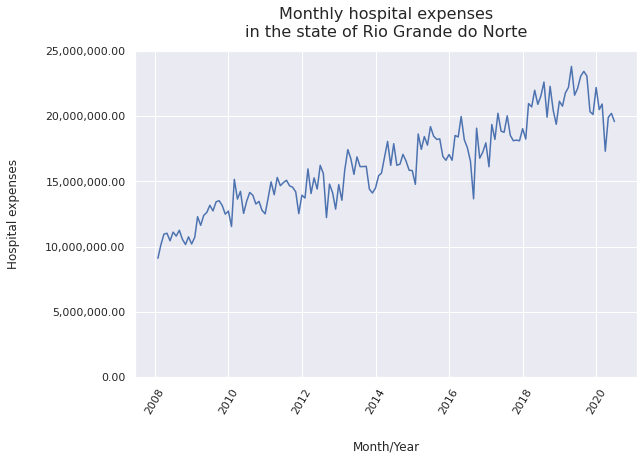

In [86]:
plt.figure(figsize=(9,6))

ax = sns.lineplot(data=hospital_expenses_by_month,
                  x=hospital_expenses_by_month.index,
                  y='Rio Grande do Norte')

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0))

plt.ylim(0, 25000000)
plt.xticks(rotation=60)
plt.title('Monthly hospital expenses\n'+
          'in the state of Rio Grande do Norte',
          fontsize=16, y=1.026)
plt.xlabel('Month/Year', labelpad=25)
plt.ylabel('Hospital expenses',labelpad=25)
plt.show()

- Even without `set_major_locator`, as the `date` information is now a date type, the graph understood this information and split the x-axis into years.

In [90]:
hospital_expenses_region.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 11 Rondônia to 53 Distrito Federal
Columns: 151 entries, 2008/Fev to Região
dtypes: float64(150), object(1)
memory usage: 32.1+ KB


In [91]:
hospital_expenses_by_month.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 2008-02-01 to 2020-07-01
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rondônia             150 non-null    float64
 1   Acre                 150 non-null    float64
 2   Amazonas             150 non-null    float64
 3   Roraima              150 non-null    float64
 4   Pará                 150 non-null    float64
 5   Amapá                150 non-null    float64
 6   Tocantins            150 non-null    float64
 7   Maranhão             150 non-null    float64
 8   Piauí                150 non-null    float64
 9   Ceará                150 non-null    float64
 10  Rio Grande do Norte  150 non-null    float64
 11  Paraíba              150 non-null    float64
 12  Pernambuco           150 non-null    float64
 13  Alagoas              150 non-null    float64
 14  Sergipe              150 non-null    float64
 15  Bahia                150 non-

In [92]:
hospital_expenses_by_month.index[0]

datetime.date(2008, 2, 1)

# Lesson 4 - Part 02

In [121]:
hospital_expenses_by_month_melted = \
    hospital_expenses_by_month \
        .reset_index() \
        .melt(id_vars=['index'],
              value_vars=hospital_expenses_by_month.columns)

hospital_expenses_by_month_melted.columns = ['date', 'state', 'expenses']
hospital_expenses_by_month_melted['date'] = pd.to_datetime(hospital_expenses_by_month_melted['date'])

hospital_expenses_by_month_melted.head()

,date,state,expenses
0,2008-02-01,Rondônia,"1,940,792.63"
1,2008-03-01,Rondônia,"1,955,721.68"
2,2008-04-01,Rondônia,"2,143,353.81"
3,2008-05-01,Rondônia,"2,280,382.58"
4,2008-06-01,Rondônia,"2,624,542.97"


**Challenge 1: Convert hospital_expenses_by_month_melted format to the same format as hospital_expenses_by_month.**

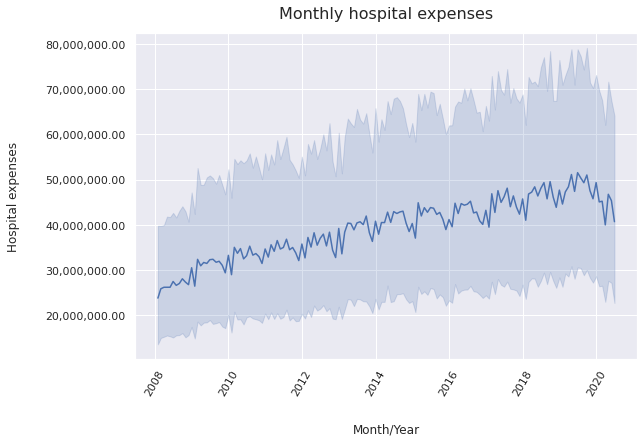

In [122]:
plt.figure(figsize=(9,6))

ax = sns.lineplot(data=hospital_expenses_by_month_melted,
                  x='date', y='expenses')

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.xticks(rotation=60)
plt.title('Monthly hospital expenses',
          fontsize=16, y=1.026)
plt.xlabel('Month/Year', labelpad=25)
plt.ylabel('Hospital expenses',labelpad=25)
plt.show()

- The line blue dark represents the average.
- The blue area represents the confidence interval.

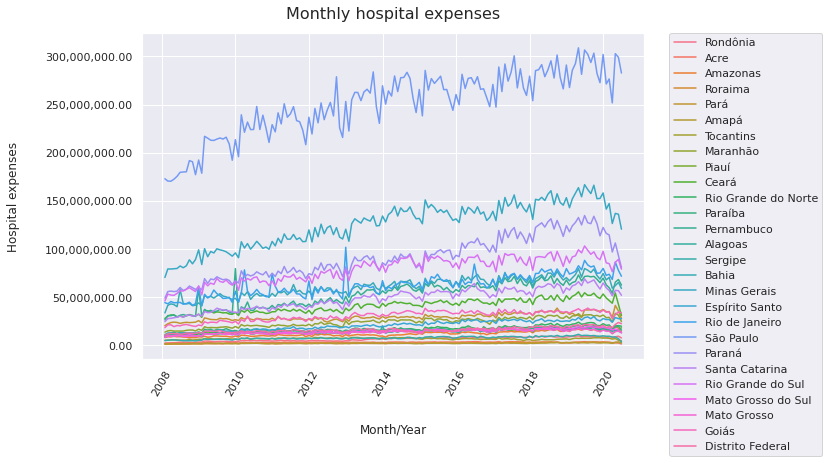

In [123]:
plt.figure(figsize=(9,6))

ax = sns.lineplot(data=hospital_expenses_by_month_melted,
                  x='date', y='expenses', hue='state')

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.xticks(rotation=60)

plt.title('Monthly hospital expenses', fontsize=16, y=1.026)

plt.xlabel('Month/Year', labelpad=25)
plt.ylabel('Hospital expenses',labelpad=25)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

**Challenge 2: Make improvements on the graph.**

## Challenge 1: Learn about DateTime in Python

See: https://docs.python.org/3/library/datetime.html

## Challenge 2: Convert hospital_expenses_by_month_melted format to the same format as hospital_expenses_by_month

In [124]:
hospital_expenses_by_month_melted.head()

,date,state,expenses
0,2008-02-01,Rondônia,"1,940,792.63"
1,2008-03-01,Rondônia,"1,955,721.68"
2,2008-04-01,Rondônia,"2,143,353.81"
3,2008-05-01,Rondônia,"2,280,382.58"
4,2008-06-01,Rondônia,"2,624,542.97"


In [125]:
hospital_expenses_by_month.head()

Unidade da Federação,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,...,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
2008-02-01,"1,940,792.63","1,743,978.66","7,934,652.10","771,687.83","20,126,081.01","1,275,063.72","5,051,932.07","13,452,263.93","9,711,680.20","27,643,304.86",...,"10,032,886.43","44,122,593.19","172,834,914.73","48,855,046.46","24,409,572.92","45,897,704.82","8,279,288.79","7,929,894.93","18,149,374.27","10,215,956.80"
2008-03-01,"1,955,721.68","2,057,439.02","8,641,517.13","876,091.18","22,149,375.82","1,177,745.93","5,200,151.87","14,750,895.33","10,428,191.09","30,085,370.22",...,"12,262,049.08","42,892,665.52","170,481,849.56","55,611,791.07","27,483,480.50","52,928,695.92","9,793,888.78","9,416,367.68","20,992,213.03","11,627,918.26"
2008-04-01,"2,143,353.81","2,057,829.69","8,531,576.49","896,952.53","23,436,682.75","1,396,371.51","5,343,714.73","15,148,647.11","10,227,943.00","31,376,221.00",...,"12,453,466.98","45,295,962.86","170,278,285.95","56,115,135.82","27,806,641.44","51,972,416.77","8,997,542.75","9,390,588.03","21,049,477.30","11,922,015.36"
2008-05-01,"2,280,382.58","2,226,577.93","9,079,902.15","1,027,288.73","23,861,080.80","1,411,520.77","5,344,487.99","14,543,679.92","10,562,148.66","31,189,904.62",...,"11,789,786.09","43,951,349.46","172,402,180.59","55,574,831.93","28,354,279.52","51,679,350.79","9,842,108.59","9,378,197.25","19,162,546.79","11,900,817.00"
2008-06-01,"2,624,542.97","2,112,576.82","8,646,295.77","938,293.54","23,502,915.90","1,420,892.01","5,398,413.09","14,553,978.06","10,465,088.93","29,463,965.11",...,"11,889,687.35","44,102,925.77","175,416,595.83","56,094,754.74","28,993,292.76","53,759,674.01","10,257,782.00","9,450,300.60","20,332,533.92","11,969,271.76"


In [126]:
hospital_expenses_by_month_melted \
    .pivot(index='date',
           columns='state',
           values='expenses') \
    .head()

state,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,...,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
date,,,,,,,,,,,,,,,,,,,,,
2008-02-01,"1,743,978.66","8,112,220.30","1,275,063.72","7,934,652.10","33,410,124.06","27,643,304.86","10,215,956.80","10,032,886.43","18,149,374.27","13,452,263.93",...,"9,711,680.20","9,110,108.87","45,897,704.82","44,122,593.19","1,940,792.63","771,687.83","24,409,572.92","4,636,850.76","172,834,914.73","5,051,932.07"
2008-03-01,"2,057,439.02","9,210,505.56","1,177,745.93","8,641,517.13","41,301,703.40","30,085,370.22","11,627,918.26","12,262,049.08","20,992,213.03","14,750,895.33",...,"10,428,191.09","10,126,626.54","52,928,695.92","42,892,665.52","1,955,721.68","876,091.18","27,483,480.50","5,017,838.07","170,481,849.56","5,200,151.87"
2008-04-01,"2,057,829.69","10,466,691.94","1,396,371.51","8,531,576.49","42,826,993.62","31,376,221.00","11,922,015.36","12,453,466.98","21,049,477.30","15,148,647.11",...,"10,227,943.00","10,964,234.85","51,972,416.77","45,295,962.86","2,143,353.81","896,952.53","27,806,641.44","5,265,951.03","170,278,285.95","5,343,714.73"
2008-05-01,"2,226,577.93","9,844,096.03","1,411,520.77","9,079,902.15","42,071,294.17","31,189,904.62","11,900,817.00","11,789,786.09","19,162,546.79","14,543,679.92",...,"10,562,148.66","11,032,871.23","51,679,350.79","43,951,349.46","2,280,382.58","1,027,288.73","28,354,279.52","5,367,094.94","172,402,180.59","5,344,487.99"
2008-06-01,"2,112,576.82","10,288,668.11","1,420,892.01","8,646,295.77","39,910,042.40","29,463,965.11","11,969,271.76","11,889,687.35","20,332,533.92","14,553,978.06",...,"10,465,088.93","10,450,599.08","53,759,674.01","44,102,925.77","2,624,542.97","938,293.54","28,993,292.76","4,981,036.36","175,416,595.83","5,398,413.09"


## Challenge 3: Make improvements on the Monthly hospital expenses graph

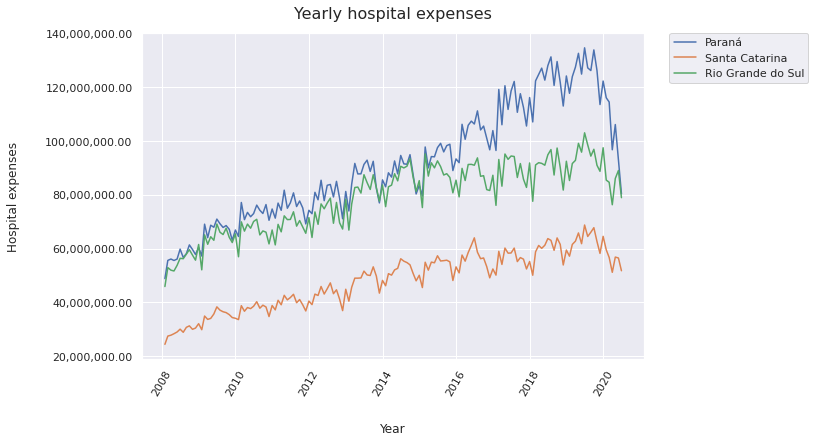

In [127]:
states_to_plot = ['Rio Grande do Sul', 'Santa Catarina', 'Paraná']

plt.figure(figsize=(9,6))

ax = sns.lineplot(data=hospital_expenses_by_month_melted \
                        [hospital_expenses_by_month_melted.state.isin(states_to_plot)],
                  x='date', y='expenses', hue='state')

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.xticks(rotation=60)

plt.title('Yearly hospital expenses', fontsize=16, y=1.026)

plt.xlabel('Year', labelpad=25)
plt.ylabel('Hospital expenses',labelpad=25)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

# Lesson 5 - Evaluate annual hospital expenses
Aula 05: Comparando gastos ano a ano

---

In [128]:
hospital_expenses_by_month_melted['month'] = \
    hospital_expenses_by_month_melted['date'].dt.month

hospital_expenses_by_month_melted['year'] = \
    hospital_expenses_by_month_melted['date'].dt.year

hospital_expenses_by_month_melted.head()

,date,state,expenses,month,year
0,2008-02-01,Rondônia,"1,940,792.63",2,2008
1,2008-03-01,Rondônia,"1,955,721.68",3,2008
2,2008-04-01,Rondônia,"2,143,353.81",4,2008
3,2008-05-01,Rondônia,"2,280,382.58",5,2008
4,2008-06-01,Rondônia,"2,624,542.97",6,2008


In [129]:
hospital_expenses_by_month_melted.date[0]

Timestamp('2008-02-01 00:00:00')

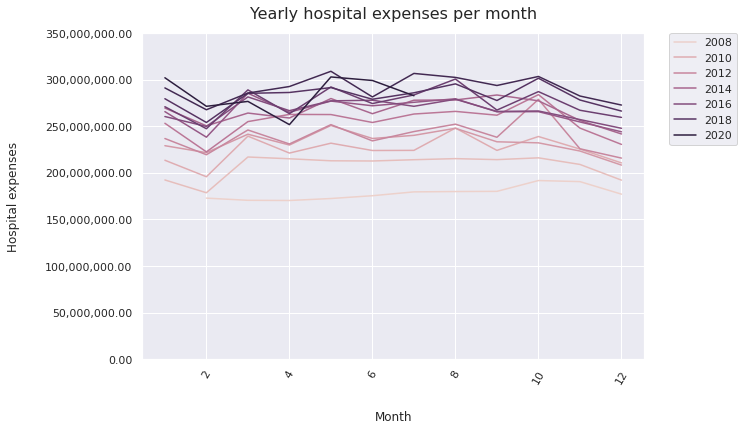

In [132]:
plt.figure(figsize=(9,6))

ax = sns.lineplot(data=hospital_expenses_by_month_melted \
                        [hospital_expenses_by_month_melted.state == 'São Paulo'],
                  x='month', y='expenses', hue='year')

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.xticks(rotation=60)

plt.title('Yearly hospital expenses per month', fontsize=16, y=1.026)

plt.xlabel('Month', labelpad=25)
plt.ylabel('Hospital expenses',labelpad=25)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.ylim(0, 350000000)
plt.show()

- With this graph we want just to see if there are any common peaks in any month.

**Challenge 1: Make improvements on the 'Yearly hospital expenses' graph.** <br>
pallete, title, x-axis ticks, you can choose another state.

**Challenge 2: Plot line graphs for 2 different states (which have a different climate).** <br>

In [133]:
month_qty_days = {
    1: 31,
    2: 28,
    3: 31,
    4: 30,
    5: 31,
    6: 30,
    7: 31,
    8: 31,
    9: 30,
    10: 31,
    11: 30,
    12: 31
}

hospital_expenses_by_month_melted['month'] \
    .map(month_qty_days)

0       28
1       31
2       30
3       31
4       30
        ..
4045    31
4046    30
4047    31
4048    30
4049    31
Name: month, Length: 4050, dtype: int64

In [136]:
hospital_expenses_by_month_melted['daily_expense'] = \
    (hospital_expenses_by_month_melted['expenses'] /
     hospital_expenses_by_month_melted['month'] \
        .map(month_qty_days))

hospital_expenses_by_month_melted.head()

,date,state,expenses,month,year,daily_expense
0,2008-02-01,Rondônia,"1,940,792.63",2,2008,"69,314.02"
1,2008-03-01,Rondônia,"1,955,721.68",3,2008,"63,087.80"
2,2008-04-01,Rondônia,"2,143,353.81",4,2008,"71,445.13"
3,2008-05-01,Rondônia,"2,280,382.58",5,2008,"73,560.73"
4,2008-06-01,Rondônia,"2,624,542.97",6,2008,"87,484.77"


In [165]:
# my solution

from calendar import monthrange

hospital_expenses_by_month_melted['daily_expense_2'] = \
    hospital_expenses_by_month_melted \
        .apply(lambda row: (row['expenses'] /
                            (monthrange(row['year'], row['month'])[1])), 
               axis=1)

In [166]:
hospital_expenses_by_month_melted.head()

,date,state,expenses,month,year,daily_expense,daily_expense_2
0,2008-02-01,Rondônia,"1,940,792.63",2,2008,"69,314.02","66,923.88"
1,2008-03-01,Rondônia,"1,955,721.68",3,2008,"63,087.80","63,087.80"
2,2008-04-01,Rondônia,"2,143,353.81",4,2008,"71,445.13","71,445.13"
3,2008-05-01,Rondônia,"2,280,382.58",5,2008,"73,560.73","73,560.73"
4,2008-06-01,Rondônia,"2,624,542.97",6,2008,"87,484.77","87,484.77"


In [169]:
hospital_expenses_by_month_melted \
    [hospital_expenses_by_month_melted.state == 'São Paulo'] \
    .head()

,date,state,expenses,month,year,daily_expense,daily_expense_2
2850,2008-02-01,São Paulo,"172,834,914.73",2,2008,"6,172,675.53","5,959,824.65"
2851,2008-03-01,São Paulo,"170,481,849.56",3,2008,"5,499,414.50","5,499,414.50"
2852,2008-04-01,São Paulo,"170,278,285.95",4,2008,"5,675,942.86","5,675,942.86"
2853,2008-05-01,São Paulo,"172,402,180.59",5,2008,"5,561,360.66","5,561,360.66"
2854,2008-06-01,São Paulo,"175,416,595.83",6,2008,"5,847,219.86","5,847,219.86"


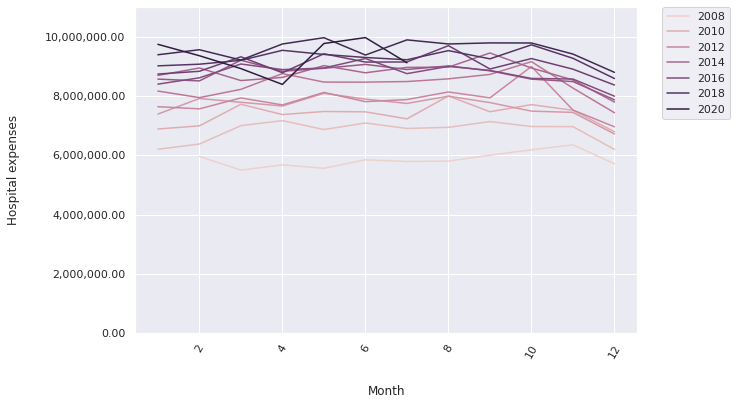

In [173]:
plt.figure(figsize=(9,6))

ax = sns.lineplot(data=hospital_expenses_by_month_melted \
                        [hospital_expenses_by_month_melted.state == 'São Paulo'],
                  x='month', y='daily_expense_2', hue='year')

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.xticks(rotation=60)

plt.xlabel('Month', labelpad=25)
plt.ylabel('Hospital expenses',labelpad=25)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.ylim(0, 11000000)
plt.show()

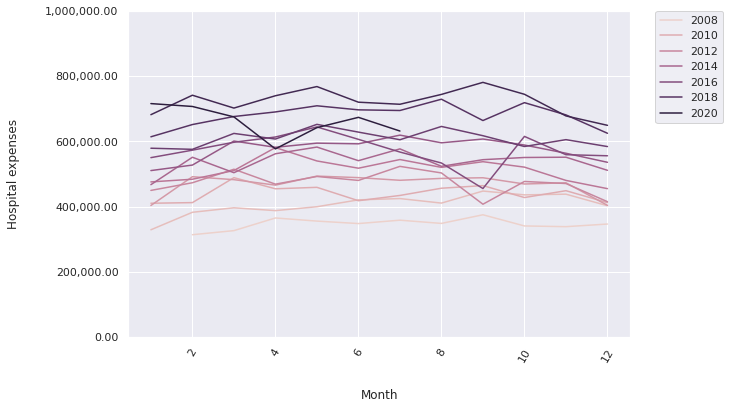

In [179]:
plt.figure(figsize=(9,6))

ax = sns.lineplot(data=hospital_expenses_by_month_melted \
                        [hospital_expenses_by_month_melted.state == 'Rio Grande do Norte'],
                  x='month', y='daily_expense_2', hue='year')

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.xticks(rotation=60)

plt.xlabel('Month', labelpad=25)
plt.ylabel('Hospital expenses',labelpad=25)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.ylim(0, 1000000)
plt.show()

## Challenge 1: Make improvements on the 'Yearly hospital expenses' graph
pallete, title, x-axis ticks, you can choose another state.

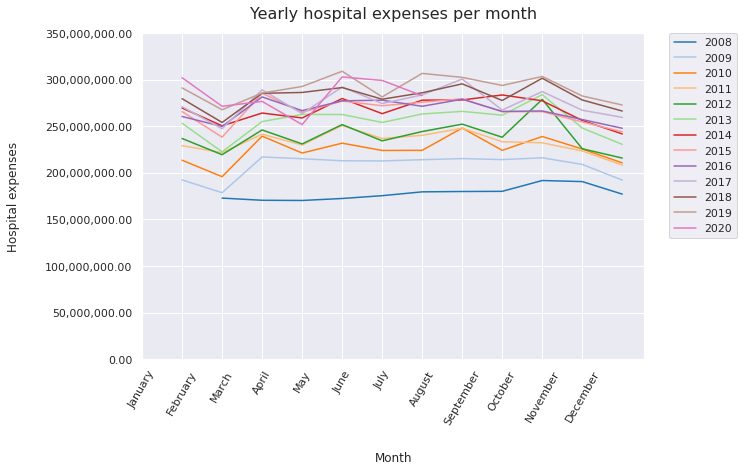

In [194]:
import calendar

plt.figure(figsize=(9,6))

ax = sns.lineplot(data=hospital_expenses_by_month_melted \
                        [hospital_expenses_by_month_melted.state == 'São Paulo'],
                  x='month', y='expenses', hue='year', palette='tab20')

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.xticks(np.arange(12), calendar.month_name[1:13], rotation=60)

plt.title('Yearly hospital expenses per month', fontsize=16, y=1.026)

plt.xlabel('Month', labelpad=25)
plt.ylabel('Hospital expenses',labelpad=25)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.ylim(0, 350000000)
plt.show()

## Challenge 2: Plot line graphs for 2 different states (which have a different climate)

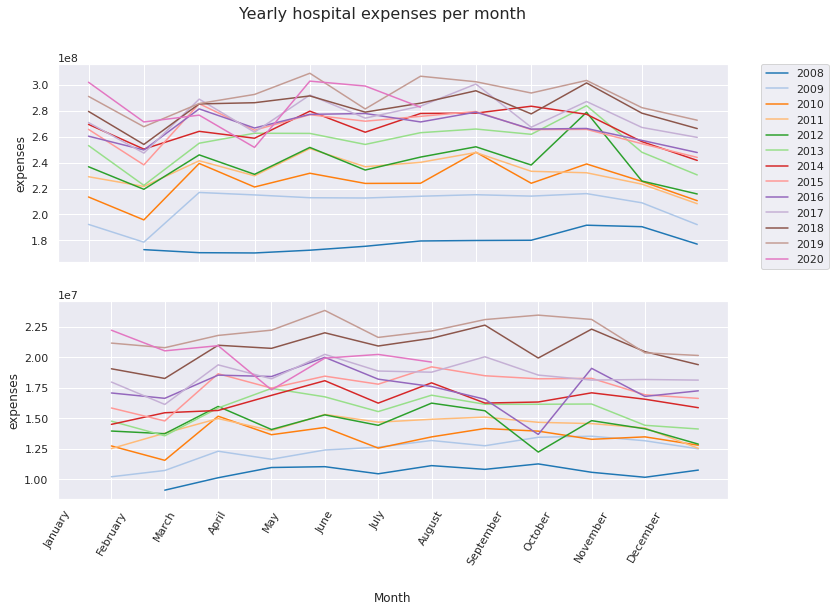

In [225]:
fig, axis = plt.subplots(2,1, figsize=(12,8), sharex=True)


ax1 = sns.lineplot(data=hospital_expenses_by_month_melted \
                     [hospital_expenses_by_month_melted.state == 'São Paulo'],
                   x='month', y='expenses', hue='year', palette='tab20',
                   ax=axis[0])

ax2 = sns.lineplot(data=hospital_expenses_by_month_melted \
                     [hospital_expenses_by_month_melted.state == 'Rio Grande do Norte'],
                   x='month', y='expenses', hue='year', palette='tab20',
                   ax=axis[1], legend=None)

ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.xticks(np.arange(12), calendar.month_name[1:13], rotation=60)
plt.xlabel('Month', labelpad=25)

fig.suptitle('Yearly hospital expenses per month', fontsize=16)

plt.show()

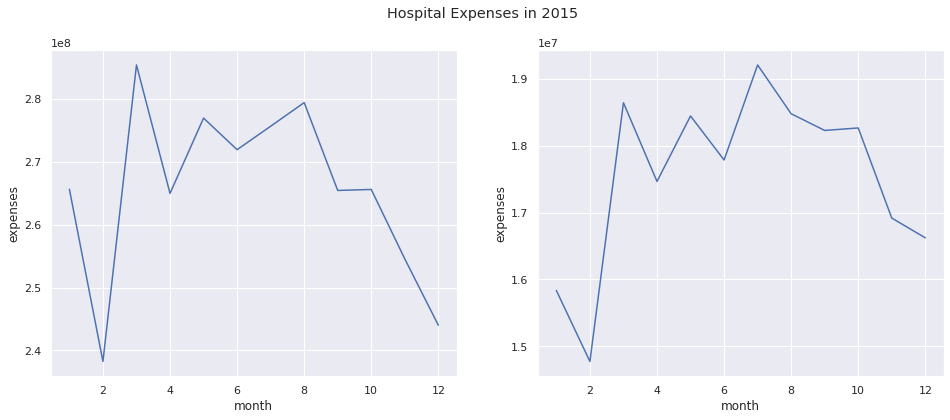

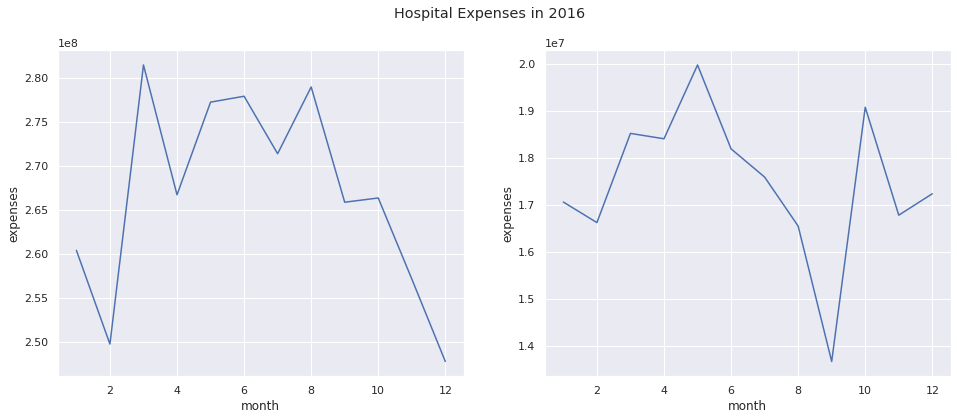

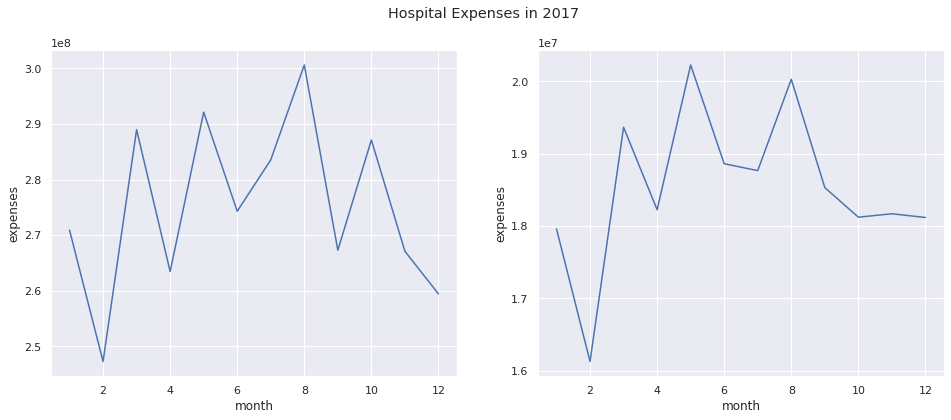

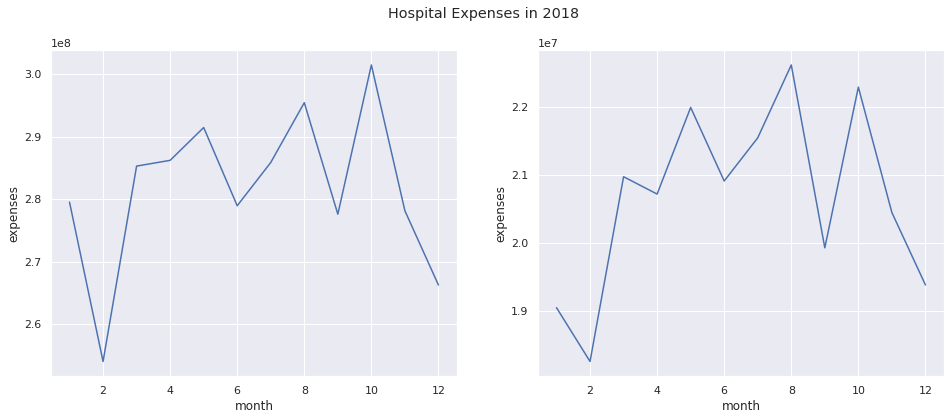

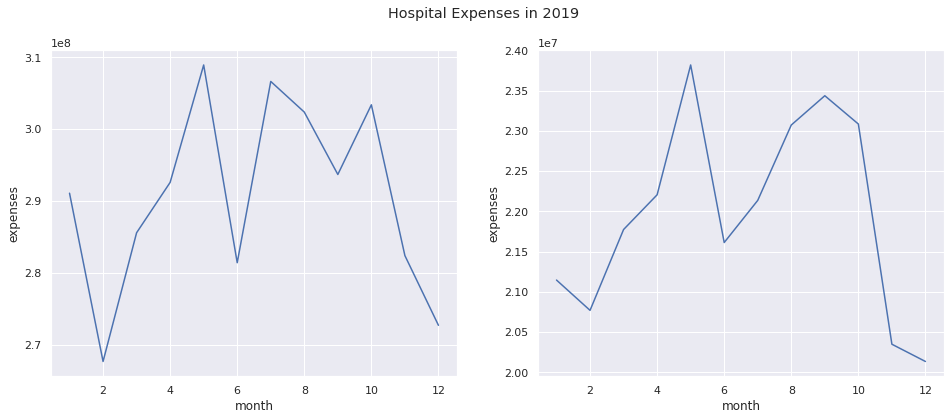

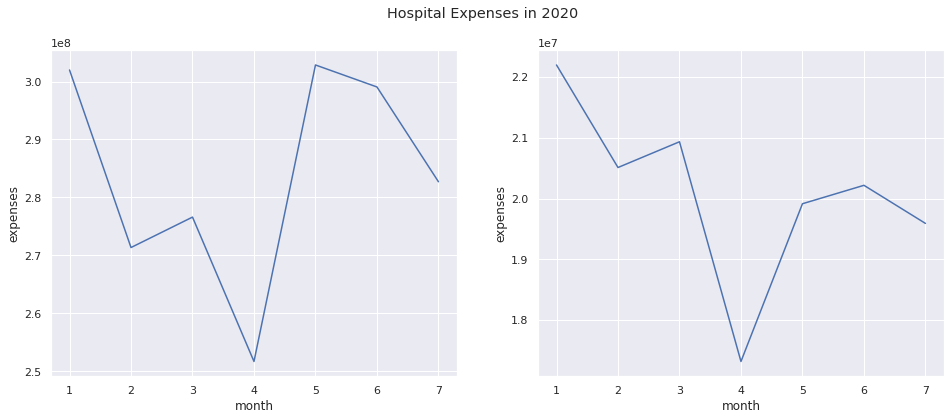

In [240]:
states_to_plot = ['São Paulo', 'Rio Grande do Norte']

hospital_expenses_melted_sp_rn = \
    hospital_expenses_by_month_melted \
        [hospital_expenses_by_month_melted.state.isin(states_to_plot)]

years = hospital_expenses_melted_sp_rn['year'].unique()

for year in years[7:]:
    
    fig, axis = plt.subplots(1,2, figsize=(16,6))
    
    sns.lineplot(data=hospital_expenses_melted_sp_rn \
                      [(hospital_expenses_melted_sp_rn.state == 'São Paulo') &
                       (hospital_expenses_melted_sp_rn.year == year)],
                 x='month', y='expenses', palette='tab20',
                 ax=axis[0])
    
    sns.lineplot(data=hospital_expenses_melted_sp_rn \
                      [(hospital_expenses_melted_sp_rn.state == 'Rio Grande do Norte') &
                       (hospital_expenses_melted_sp_rn.year == year)],
                 x='month', y='expenses', palette='tab20',
                 ax=axis[1])
        
    fig.suptitle('Hospital Expenses in '+str(year))
    plt.show()